In [4]:
#1. Load the required libraries and read the dataset.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
df = pd.read_csv('renttherunway.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features  ---     lets check first few samples
df.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14.0,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12.0,36.0,"June 18, 2013"


In [7]:
## lets check the shape of the dataset
df.shape

(123304, 15)

In [8]:
## lets check the basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123304 entries, 0 to 123303
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             123304 non-null  object 
 1   user_id         123304 non-null  int64  
 2   bust size       111565 non-null  object 
 3   item_id         123304 non-null  int64  
 4   weight          104130 non-null  object 
 5   rating          123251 non-null  float64
 6   rented for      123296 non-null  object 
 7   review_text     123266 non-null  object 
 8   body type       114039 non-null  object 
 9   review_summary  123073 non-null  object 
 10  category        123303 non-null  object 
 11  height          122860 non-null  object 
 12  size            123303 non-null  float64
 13  age             122681 non-null  float64
 14  review_date     123303 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.4+ MB


In [9]:
#3. Check if there are any duplicate records in the dataset? If any drop them
## checking the presence of duplicate records
len(df[df.duplicated()])

84

In [10]:
## dropping the duplicated record from the dataset
df.drop_duplicates(inplace=True)

In [11]:
## recheck the presence of the duplicate record
len(df[df.duplicated()])

0

In [12]:
#4. Drop the columns which you think redundant for the analysis.(Hint drop columns like 'id', 'review')
## dropping the redundant columns from the dataset.
df.drop(['user_id', 'item_id', 'review_text', 'review_summary', 'review_date'],axis=1,inplace=True)

In [13]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14.0,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12.0,36.0


In [14]:
#5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

df['weight'] = df['weight'].str.replace('lbs','').astype(float)

In [15]:
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

In [16]:
#6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with the 'party'.
df['rented for'].unique()


array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [17]:
## grouping 'party: cocktail' category with the 'party'.
df['rented for'] = df['rented for'].str.replace('party: cocktail','party')

In [18]:
## recheck unique values after grouping
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [19]:
#7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.
## Removing quotation marks
df['height'] = df['height'].str.replace("'",'')
df['height'] = df['height'].str.replace('"','')

In [20]:
## Convert the feet to inches and convert the datatype to float
df['height'] = (df['height'].str[:1].astype(float)*12 + df['height'].str[1:].astype(float))

In [21]:
df['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

In [23]:
#8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.
df.isnull().sum()/len(df)*100

fit            0.000000
bust size      9.518747
weight        15.553482
rating         0.042201
rented for     0.006492
body type      7.515014
category       0.000812
height         0.360331
size           0.000812
age            0.505600
dtype: float64

In [24]:
## Lets treat numerical columns with median imputation technique.
for col in ['weight','rating','height','age']:
    df[col].fillna(df[col].median(), inplace=True)

In [25]:
## Lets treat categoricak columns with mode imputation technique.
for col in ['bust size','rented for','body type','category']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [26]:
## lets recheck the missing values
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          1
age           0
dtype: int64

In [27]:
#9. Check the statistical summary for the numerical and categorical columns and write your findings.
## let us check the statistical summary for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,123220.0,137.002954,20.103996,50.0,125.0,135.0,145.0,300.0
rating,123220.0,9.096137,1.429587,2.0,8.0,10.0,10.0,10.0
height,123220.0,65.310842,2.657167,54.0,63.0,65.0,67.0,78.0
size,123219.0,12.228114,8.491719,0.0,8.0,12.0,16.0,58.0
age,123220.0,33.852289,8.045005,0.0,29.0,32.0,37.0,117.0


In [28]:
## let us check the statistical summary for the categorical columns.
df.describe(include='O').T

,count,unique,top,freq
fit,123220,3,fit,90880
bust size,123220,103,34b,29345
rented for,123220,8,wedding,36967
body type,123220,7,hourglass,44568
category,123220,68,dress,59245


In [49]:
#10. Is there outliers present in the column age? If yes treat them with appropriate method
%pip install seaborn
import seaborn as sns

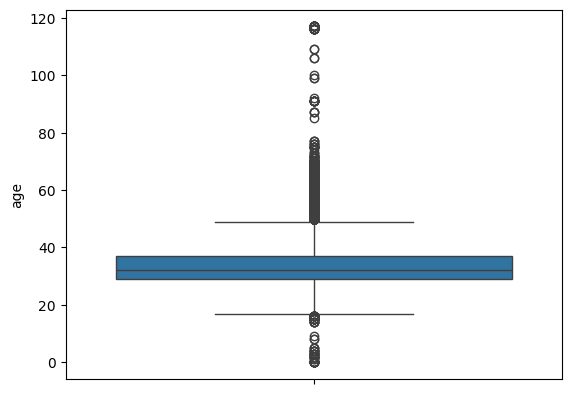

<class 'NameError'>: name 'plt' is not defined

In [50]:
sns.boxplot(df['age'])
plt.show()

In [51]:
## lets treat the outliers in the column age using capping techinque

df['age'] = pd.DataFrame(np.where(df['age']>=100,100,df['age']))
df['age'] = pd.DataFrame(np.where(df['age']<=20,20,df['age']))

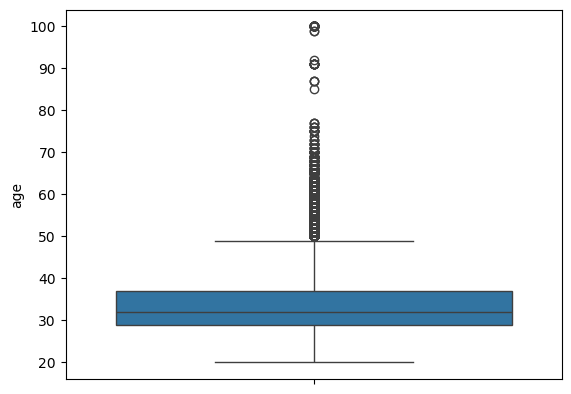

<class 'NameError'>: name 'plt' is not defined

In [52]:
sns.boxplot(df['age'])
plt.show()

In [53]:
## after applying capping technique for the column age, there might be some presence of missing values in columns age, So drop them
df.dropna(inplace=True)

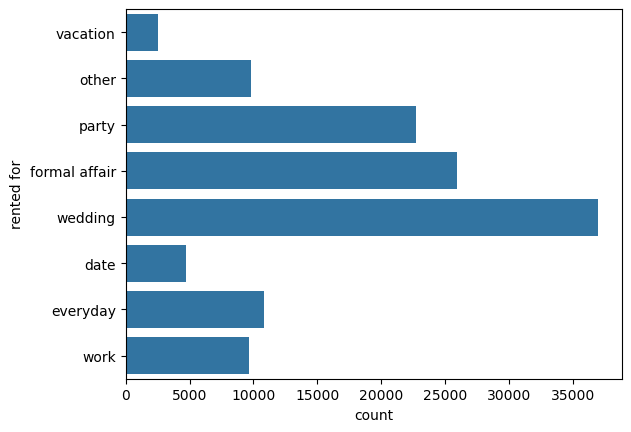

<class 'NameError'>: name 'plt' is not defined

In [54]:
#11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.
## let us check the distribution of the column rented for
sns.countplot(df['rented for'])
plt.xticks(rotation=45)
plt.show()

In [55]:
## Let us make a copy of the cleaned dataset before encoding and standardizing the columns
dfc1 = df.copy()

In [56]:
#12. Encode the categorical variables in the dataset.
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

<class 'NameError'>: name 'LabelEncoder' is not defined

In [57]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14.0,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12.0,36.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4.0,100.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8.0,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12.0,27.0


In [64]:
#13. Standardize the data, so that the values are within a particular range.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [75]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])

df.head()

<class 'ValueError'>: could not convert string to float: 'fit'

In [65]:
## Let us make a copy of the cleaned dataset after encoding and standardizing the columns.
dfc2 = df.copy()

In [68]:
#14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(df.T)
cov_matrix

<class 'TypeError'>: unsupported operand type(s) for /: 'str' and 'int'

In [69]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

<class 'NameError'>: name 'cov_matrix' is not defined

In [70]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

<class 'NameError'>: name 'eig_vals' is not defined

In [71]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

<class 'NameError'>: name 'var_exp' is not defined

In [77]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

In [78]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 6)
pca = PCA(n_components=6)

pca_df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

<class 'ValueError'>: could not convert string to float: 'fit'

In [79]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

<class 'NameError'>: name 'pca_df' is not defined

In [80]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

<class 'ValueError'>: All arrays must be of the same length

In [81]:
## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

<Figure size 1500x500 with 0 Axes>

<class 'NameError'>: name 'cluster_df' is not defined

In [82]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

<class 'NameError'>: name 'pca_df' is not defined

In [83]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

<class 'AttributeError'>: 'KMeans' object has no attribute 'labels_'

In [84]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

<class 'NameError'>: name 'pca_df' is not defined

In [85]:
kmeans_df['Label'].value_counts()

<class 'NameError'>: name 'kmeans_df' is not defined

In [86]:
## finding optimal clusters through silhoutte score
from sklearn.metrics import silhouette_score
for i in range(2,15):
    kmeans = KMeans(i,random_state=100)
    kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

<class 'NameError'>: name 'pca_df' is not defined

In [88]:
df.head(4)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14.0,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12.0,36.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4.0,100.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8.0,34.0


In [89]:
plt.figure(figsize=[18,5])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

<Figure size 1800x500 with 0 Axes>

<class 'ValueError'>: could not convert string to float: 'fit'

In [90]:
## Building hierarchical clustering model using the optimal clusters as 2
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(df)

<class 'ValueError'>: could not convert string to float: 'fit'

In [91]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

<class 'NameError'>: name 'hie_cluster_model' is not defined

In [95]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc1)

dfc3 = dfc3.join(dfc3_label)
dfc3.head()



<class 'NameError'>: name 'dfc3' is not defined

In [94]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dfc3)
    labels = hier.fit_predict(dfc3)
    print(i,silhouette_score(dfc3,labels))

<class 'NameError'>: name 'dfc3' is not defined

In [96]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14.0,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12.0,36.0


In [ ]:
df.value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

In [ ]:
## Let us check the distribution of the different categories of 'rented for' column 
## w.r.t the clusters formed by agglomerative clustering technique.
sns.countplot(df['rented for'],hue='Labels',data=df)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Lets check the age distribution of the different clusters.
sns.kdeplot(df['age'],hue='Labels',data=df)
plt.show()